In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob

In [4]:
agebs_seleccionadas = gpd.read_file('geodata.gpkg')
agebs_seleccionadas = agebs_seleccionadas.to_crs("EPSG:4326")
agebs_seleccionadas = agebs_seleccionadas[["CVEGEO", "CVE_ENT", "CVE_MUN", "CVE_LOC", "CVE_AGEB", "metrica", "geometry"]]
agebs_seleccionadas.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,metrica,geometry
0,060020001127A,06,002,0001,127A,0.551410,"POLYGON ((-103.73577 19.24392, -103.73577 19.2..."
1,0600200010731,06,002,0001,0731,0.541942,"POLYGON ((-103.73430 19.24640, -103.73432 19.2..."
2,0600200011513,06,002,0001,1513,0.539966,"POLYGON ((-103.73608 19.24041, -103.73623 19.2..."
3,0600200010746,06,002,0001,0746,0.504686,"POLYGON ((-103.72441 19.23889, -103.72539 19.2..."
4,0600200011176,06,002,0001,1176,0.499525,"POLYGON ((-103.74281 19.24436, -103.74298 19.2..."


In [5]:
cve_geo = agebs_seleccionadas['CVEGEO']
cve_geo = [x[:9] for x in cve_geo]

cve_geo = list(set(cve_geo))
cve_geo.sort()
cve_geo


['060020001',
 '060050001',
 '060050018',
 '060070001',
 '060080001',
 '060090001',
 '060100001']

In [4]:
len("060010001")

9

In [8]:
ne = glob.glob("data/numeros_exteriores/*/*ne.shp")
m = glob.glob("data/numeros_exteriores/*/*[1-9]m.shp")
ne

[]

In [7]:
ne_gpd = gpd.GeoDataFrame()

for i in ne:

    gpd_i = gpd.read_file(i)
    gpd_i = gpd_i.to_crs(epsg=32213)

    ne_gpd = pd.concat([ne_gpd, gpd_i])

ne_gpd.head()

""


In [7]:
ne_gpd.columns

Index(['GEOGRAFICO', 'CVEGEO', 'CODIGO', 'FECHAACT', 'INSTITUC', 'GEOMETRIA',
       'geometry'],
      dtype='object')

In [8]:
agebs_seleccionadas.columns

Index(['CVEGEO', 'NOM_ENT', 'NOM_MUN', 'NOM_LOC', 'CVE_AGEB', 'geometry'], dtype='object')

In [7]:
# keep elements from calles that intersect with agebs_seleccionadas
calles2 = gpd.sjoin(ne_gpd, agebs_seleccionadas, how="inner", op='intersects')
calles2.head()

C:\Users\pedro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

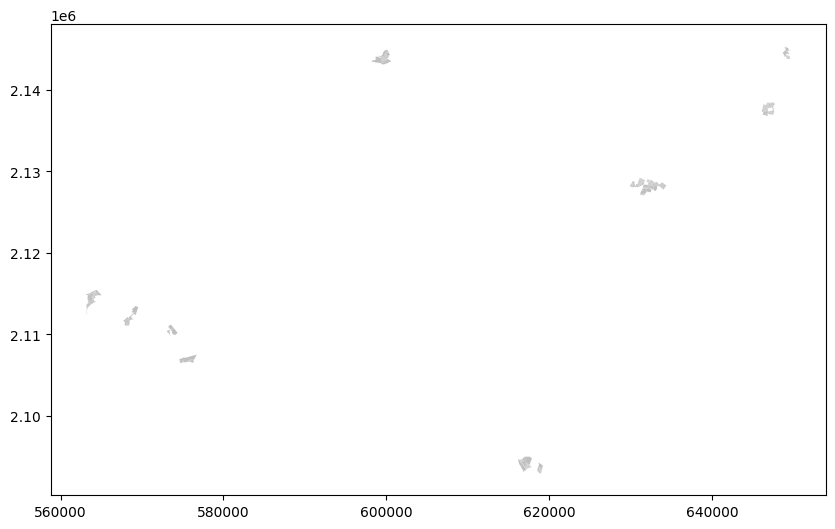

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

calles2.plot(ax=ax, color='grey', alpha=0.5)
#agebs_seleccionadas.plot(ax=ax, color='red', alpha=0.5)
plt.show()

In [11]:
calles2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 855 entries, 424 to 1960
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GEOGRAFICO    855 non-null    object  
 1   CVEGEO_left   855 non-null    object  
 2   CODIGO        855 non-null    int64   
 3   FECHAACT      855 non-null    object  
 4   INSTITUC      855 non-null    object  
 5   GEOMETRIA     855 non-null    object  
 6   geometry      855 non-null    geometry
 7   index_right   855 non-null    int64   
 8   CVEGEO_right  855 non-null    object  
 9   NOM_ENT       855 non-null    object  
 10  NOM_MUN       855 non-null    object  
 11  NOM_LOC       855 non-null    object  
 12  CVE_AGEB      855 non-null    object  
dtypes: geometry(1), int64(2), object(10)
memory usage: 93.5+ KB


In [18]:
calles2["CVE_MANZANA"] = calles2["CVEGEO_left"].str[-3:]

In [19]:
calles2.head()

,GEOGRAFICO,CVEGEO_left,CODIGO,FECHAACT,INSTITUC,GEOMETRIA,geometry,index_right,CVEGEO_right,NOM_ENT,NOM_MUN,NOM_LOC,CVE_AGEB,CVE_MANZANA
424,MANZANA,0600200010731005,6635,12/2007,INEGI,ÁREA,"POLYGON ((632886.958 2128605.709, 632793.588 2...",1,0600200010731,Colima,Colima,Colima,0731,005
426,MANZANA,0600200010731016,6635,12/2007,INEGI,ÁREA,"POLYGON ((632415.018 2128767.958, 632395.268 2...",1,0600200010731,Colima,Colima,Colima,0731,016
428,MANZANA,0600200010731013,6635,12/2007,INEGI,ÁREA,"POLYGON ((632499.268 2128781.458, 632419.518 2...",1,0600200010731,Colima,Colima,Colima,0731,013
430,MANZANA,0600200010731010,6635,12/2007,INEGI,ÁREA,"POLYGON ((632525.018 2128812.708, 632506.838 2...",1,0600200010731,Colima,Colima,Colima,0731,010
432,MANZANA,0600200010731035,6635,12/2007,INEGI,ÁREA,"POLYGON ((632703.338 2128397.209, 632547.338 2...",1,0600200010731,Colima,Colima,Colima,0731,035


In [20]:
columns_to_keep = ['CVE_MANZANA','CVE_AGEB','NOM_LOC', 'NOM_MUN',"CVEGEO_left",'geometry']
calles3 = calles2[columns_to_keep]
calles3

,CVE_MANZANA,CVE_AGEB,NOM_LOC,NOM_MUN,CVEGEO_left,geometry
424,005,0731,Colima,Colima,0600200010731005,"POLYGON ((632886.958 2128605.709, 632793.588 2..."
426,016,0731,Colima,Colima,0600200010731016,"POLYGON ((632415.018 2128767.958, 632395.268 2..."
428,013,0731,Colima,Colima,0600200010731013,"POLYGON ((632499.268 2128781.458, 632419.518 2..."
430,010,0731,Colima,Colima,0600200010731010,"POLYGON ((632525.018 2128812.708, 632506.838 2..."
432,035,0731,Colima,Colima,0600200010731035,"POLYGON ((632703.338 2128397.209, 632547.338 2..."
...,...,...,...,...,...,...
1945,006,0979,Ciudad de Villa de Álvarez,Villa de Álvarez,0601000010979006,"POLYGON ((630879.122 2128291.556, 630879.605 2..."
1946,001,0979,Ciudad de Villa de Álvarez,Villa de Álvarez,0601000010979001,"POLYGON ((630935.603 2128285.965, 630930.902 2..."
1947,008,0979,Ciudad de Villa de Álvarez,Villa de Álvarez,0601000010979008,"POLYGON ((630942.358 2128340.614, 630944.846 2..."
1948,007,0979,Ciudad de Villa de Álvarez,Villa de Álvarez,0601000010979007,"POLYGON ((630893.974 2128345.423, 630895.040 2..."


In [22]:
calles3 = calles3.to_crs(epsg=4326)

In [21]:
calles3["NOM_LOC"].value_counts()

NOM_LOC
Ciudad de Villa de Álvarez    164
Colima                        162
Cuauhtémoc                    145
Minatitlán                    129
Manzanillo                    113
Tecomán                       102
Quesería                       40
Name: count, dtype: int64

In [23]:
calles3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 855 entries, 424 to 1960
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CVE_MANZANA  855 non-null    object  
 1   CVE_AGEB     855 non-null    object  
 2   NOM_LOC      855 non-null    object  
 3   NOM_MUN      855 non-null    object  
 4   CVEGEO_left  855 non-null    object  
 5   geometry     855 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 46.8+ KB


In [28]:
calles3.columns 

Index(['CVE_MANZANA', 'CVE_AGEB', 'NOM_LOC', 'NOM_MUN', 'CVEGEO_left',
       'geometry'],
      dtype='object')

In [24]:
# export calles3 to geojson
calles3.to_file("data/calles3.geojson", driver='GeoJSON')

In [27]:
# export calles3 to json
calles3.to_file("data/calles3.json", orient="records")